In [288]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np
from dateutil.parser import parse
from utils import mean_2d_diff_size

In [289]:
LOGS_PATH = "../logs/"
objs_in_path = listdir(LOGS_PATH)
data_paths = [join(LOGS_PATH, f) for f in objs_in_path if isfile(join(LOGS_PATH, f)) and 'json' in f]

In [290]:
logs = []
for path in data_paths:
    with open(path) as f:
        d = json.load(f)
    logs.append(json_normalize(d))
data = pd.concat(logs, axis=0, ignore_index=True)
data

,batch,end-compute-time,end_time,epochs,epochs-stats,learning_rate,num_workers,reg_lambda,start-compute-time,start-time,test_accuracy,train_accuracy
0,100,2019-04-13 19:38:10.781979,2019-04-13 19:40:35.326959,200,"[{'epoch_end': '2019-04-13 19:37:03.617977', '...",0.006,5,0.00001,2019-04-13 19:36:58.318321,2019-04-13 19:36:29.811085,0.865042,0.877062
1,100,2019-04-13 20:05:55.157591,2019-04-13 20:08:42.346215,200,"[{'epoch_end': '2019-04-13 20:04:42.611127', '...",0.010,3,0.00001,2019-04-13 20:04:37.173416,2019-04-13 20:04:09.300139,0.907590,0.916224
2,100,2019-04-13 19:31:55.104226,2019-04-13 19:35:12.794132,200,"[{'epoch_end': '2019-04-13 19:30:39.309639', '...",0.006,5,0.00001,2019-04-13 19:30:33.840304,2019-04-13 19:30:05.037369,0.908959,0.917946
3,100,2019-04-13 19:49:20.070764,2019-04-13 19:51:33.646431,200,"[{'epoch_end': '2019-04-13 19:47:56.972470', '...",0.006,5,0.00001,2019-04-13 19:47:51.402916,2019-04-13 19:47:21.174534,0.907163,0.916272
4,100,2019-04-13 19:55:24.018089,2019-04-13 19:57:33.399526,200,"[{'epoch_end': '2019-04-13 19:54:22.565048', '...",0.010,3,0.00001,2019-04-13 19:54:17.354248,2019-04-13 19:53:48.391037,0.897155,0.906135
5,100,2019-04-13 19:43:57.922127,2019-04-13 19:46:12.036948,200,"[{'epoch_end': '2019-04-13 19:42:33.487564', '...",0.006,5,0.00001,2019-04-13 19:42:27.101275,2019-04-13 19:41:33.795184,0.907512,0.916798


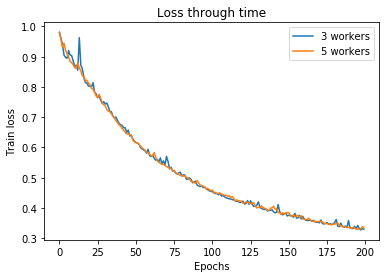

In [257]:
by_workers = data.groupby('num_workers')
for stats in by_workers['epochs-stats']:
    #stats = tuple(num_worker, pd.Series(epochs-stats))
    s = stats[1].values
    val_loss = np.array([[elem['val_loss'] for elem in one_stat] for one_stat in s])
    #val_loss = [[run1-epoch1, run1-epoch2,...], [run2-epoch1, run2-epoch2,...],...]
    mean_loss = mean_2d_diff_size(val_loss) #=[mean-epoch1, mean-epoch2, mean-epoch3,...]
    plt.plot(mean_loss, label="{} workers".format(stats[0]))
plt.legend()
plt.title("Loss through time")
plt.xlabel('Epochs')
plt.ylabel('Train loss')
plt.show()

3 66
5 83


([<matplotlib.axis.XTick at 0x7f893737cac8>,
 <a list of 2 Text xticklabel objects>)

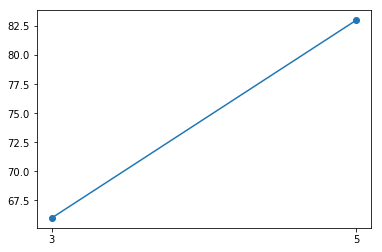

In [287]:
by_workers = data.groupby('num_workers')
times = []
workers = []
for i in by_workers:
    start_time = np.array([parse(d) for d in i[1]['start-compute-time'].values])
    end_time = np.array([parse(d) for d in i[1]['end-compute-time'].values])
    workers.append(i[0])
    times.append(np.mean([end_time - start_time]).seconds)
    print(workers[-1], times[-1])
plt.plot(workers, times, 'o-')
plt.xticks(workers)